# CCSNe Example

In [1]:
import simple
import os, logging

logging.basicConfig(level=logging.INFO)
overwrite_existing = True
defaults = simple.load_defaults('test.yaml')

models = simple.load_collection(**defaults['load_models'], overwrite=overwrite_existing)
models

Creating: "test.hdf5" from database: "data/SIMPLE_CCSNe_v2.hdf5"
INFO:SIMPLE.models:Creating: "test.hdf5" from database: "data/SIMPLE_CCSNe_v2.hdf5"
Loading file: data/SIMPLE_CCSNe_v2.hdf5
INFO:SIMPLE.models:Loading file: data/SIMPLE_CCSNe_v2.hdf5
Loading model: Ri18_m15 (CCSNe)
INFO:SIMPLE.models:Loading model: Ri18_m15 (CCSNe)
Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
INFO:SIMPLE.models:Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Converting array from ``mole`` to ``mass`` unit by multiplying the data by the mass number
INFO:SIMPLE.models:Converting array from ``mole`` to ``mass`` unit by multiplying the data by the mass number
Loading model: iniab2.0E-02GN93 (IsoRef)
INFO:SIMPLE.models:Loading model: iniab2.0E-02GN93 (IsoRef)
Loading model: W17 (IsoRef)
INFO:SIMPLE.models:Loading model: W17 (IsoRef)
Loading model: Ri18_m20 (CCSNe)
INFO:SIMPLE.models:Loading model: Ri18_m20 (CCSNe)
Converting arr

Models in collection:

- **[0]** ``Ri18_m15`` (CCSNe)
- **[1]** ``Ri18_m20`` (CCSNe)
- **[2]** ``Ri18_m25`` (CCSNe)
- **[3]** ``Pi16_m15`` (CCSNe)
- **[4]** ``Pi16_m20`` (CCSNe)
- **[5]** ``Pi16_m25`` (CCSNe)
- **[6]** ``La22_m15`` (CCSNe)
- **[7]** ``La22_m20`` (CCSNe)
- **[8]** ``La22_m25`` (CCSNe)
- **[9]** ``Si18_m15`` (CCSNe)
- **[10]** ``Si18_m20`` (CCSNe)
- **[11]** ``Si18_m25`` (CCSNe)
- **[12]** ``Ra02_m15`` (CCSNe)
- **[13]** ``Ra02_m20`` (CCSNe)
- **[14]** ``Ra02_m25`` (CCSNe)
- **[15]** ``LC18_m15`` (CCSNe)
- **[16]** ``LC18_m20`` (CCSNe)
- **[17]** ``LC18_m25`` (CCSNe)

References in collection:

- ``iniab2.0E-02GN93`` (IsoRef)
- ``W17`` (IsoRef)
- ``iniab2.0E-02GN93_Lo03`` (IsoRef)
- ``iniab1.3E-02Lo03_Lo03_merged`` (IsoRef)
- ``rau_solar_ref`` (IsoRef)
- ``iniab1.3E-02As09_As09_merged`` (IsoRef)

In [2]:
models[0]

**Name**: Ri18_m15\
**Type**: CCSNe\
**Dataset**: Ri18\
**Mass**: 15\
**Attributes**: *name*, *type*, *dataset*, *citation*, *refid_isoabu*, *refid_isomass*, *mass*, *abundance_unit*, *masscoord*, *onion_lbounds*, *clsname*, *abundance_values*, *abundance_keys*, *abundance*

---
This does the internal normalisation and solar - 1 normalisation.
These are avaliable through the ``intnorm`` and ``simplenorm`` attributes on each model after this. Each of these attributes is a dict containing the result of the calculations. 

For internally normalised the main result is called ``eRi`` which is contains the internally normalised data. Note that unlike this result has not been divided by one of the ratios to create slopes. To get a slope you have to do that manually (See example below). This way we can use whatever slope we want without rerunning the calculation and we have the direction as well. 

For the solar - 1 normalisation the main result is called ``Ri``.

In [3]:
models.internal_normalisation(**defaults['internal_normalisation'])
models.simple_normalisation(**defaults['simple_normalisation'])

Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
INFO:SIMPLE.models:Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
INFO:SIMPLE.models:Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Internally normalising ('Ni-58*', 'Ni-60*', 'Ni-61*', 'Ni-62*', 'Ni-64*') to ['Ni-58*/Ni-61*'] with an enrichment factor of [1]
INFO:SIMPLE.norm:Internally normalising ('Ni-58*', 'Ni-60*', 'Ni-61*', 'Ni-62*', 'Ni-64*') to ['Ni-58*/Ni-61*'] with an enrichment factor of [1]
Internally normalising 2158 rows using the largest offset method.
INFO:SIMPLE.norm:Internally normalising 2158 rows using the largest offset method.
695 rows out of 2158 have largest offsets smaller than 1 at the minimum dilution factor of 0.1. These rows are set to nan.
Converting array from ``mass`` to ``mole`` unit by dividing the d

---
# Plotting

Plot-a-doodle-doo

In [4]:
import matplotlib.pyplot as plt
import numpy as np

colors=simple.plot.all_colors
linestyles = simple.plot.all_linestyles
markers = simple.plot.all_markers

This looks pretty much the same as the one from Gabors notebook.
The X values are lower because the values have been divided by the mass here and not in gabors notebook.
Also seems I have not cut off the lower masscoordinates in the Ritter model

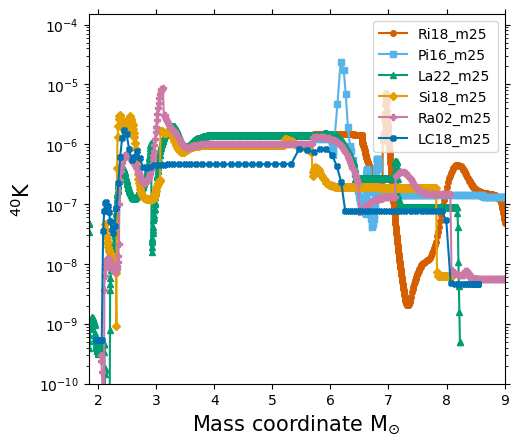

In [5]:
ifig=24
plt.figure(ifig).clear(); plt.figure(ifig)

iso = simple.asisotope('K-40')

masscut = []
for i, model in enumerate(models.where('.mass==25')):
    plt.semilogy(model.masscoord, model.abundance[iso],
                 color=colors[i], marker=markers[i], markersize=4,ls="-",
                 label=f'{model.name}')
    masscut.append(np.min(model.masscoord))
plt.legend(loc='upper right')

plt.xlim(np.min(masscut),9)
plt.ylim(1e-10,1.5e-4)
plt.xlabel('Mass coordinate M$_{\odot}$', fontsize=15)
plt.ylabel(iso.latex(),fontsize=15)
plt.tick_params(left=True,right=True,top=True,labelleft=True,which='both') #,labelright=True)

plt.gcf().subplots_adjust(left=0.25)    

plt.show()

(-1.0, 1.0)

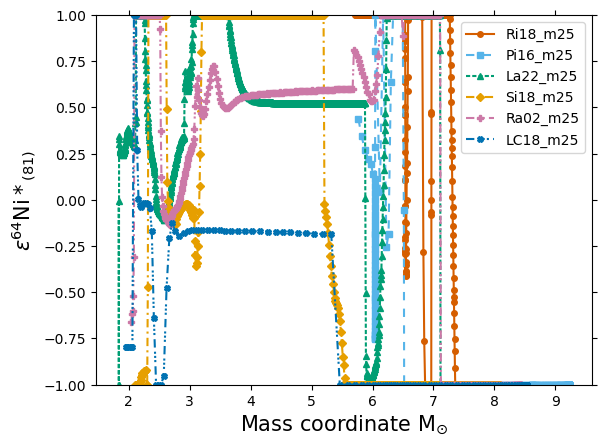

In [6]:
# I put the plotting fucntion within the ccsne namespace since they are specific to these models types.
simple.ccsne.plot_intnorm(models, 'Ni-64*', where='.mass==25', marker=True)
plt.ylim(-1,1)

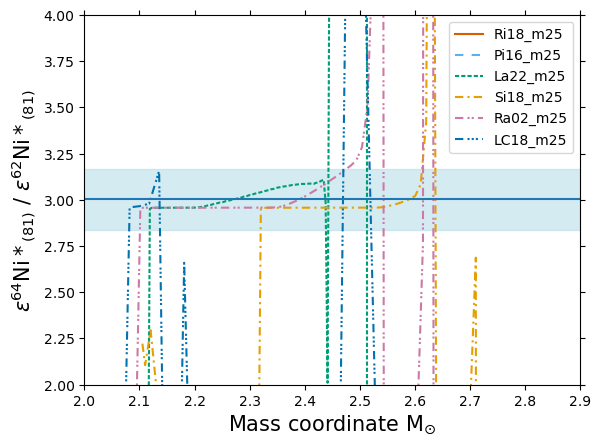

In [7]:
simple.ccsne.plot_intnorm(models, 'Ni-64*/Ni-62*', where='.mass==25')
plt.ylim(-10,15)

plt.xlim(2,2.9)
plt.ylim(2,4)
plt.hlines(3.003,0,10)
x = np.linspace(0, 10, 100)
plt.fill_between(x, 3.003-0.166, 3.003+0.166, color='lightblue', alpha=0.5)

Text(0.5, 1.0, '')

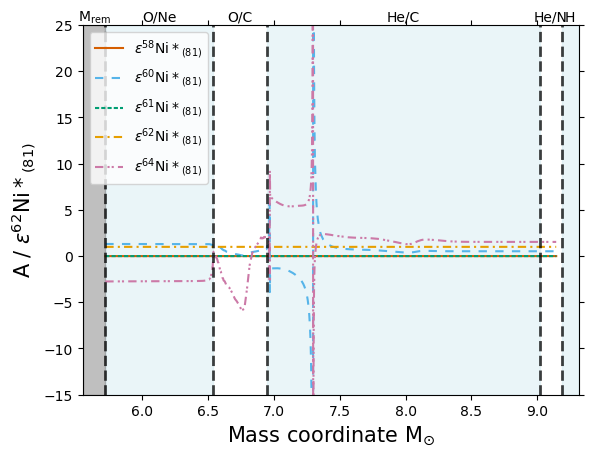

In [8]:
plt.ylim(-15,25) 
simple.ccsne.plot_intnorm(models, **defaults['plot_slopes_example'])
plt.title(None)
#plt.xlim(5.5,9)


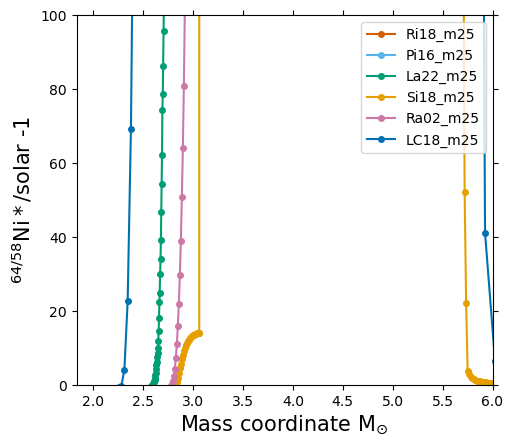

In [9]:
# plot solar isotopes_or_ratios - 1 for selected isotopes, for different models
ifig=26
plt.figure(ifig).clear(); plt.figure(ifig)

iso = simple.asisotope('Ni-64*')

masscut = []
for i, model in enumerate(models.where('.mass==25')):
    plt.plot(model.masscoord, model.simplenorm['Ri'][iso],
                 color=colors[i], marker=markers[0], markersize=4,ls=linestyles[0],
                 label=f'{model.name}')
    masscut.append(np.min(model.masscoord))
plt.legend(loc='upper right')

plt.xlim(np.min(masscut),6)
plt.ylim(0,100)
plt.xlabel('Mass coordinate M$_{\odot}$', fontsize=15)
plt.ylabel(f'{models[0].simplenorm["label_latex"][iso]}/solar -1',fontsize=15)
plt.tick_params(left=True,right=True,top=True,labelleft=True,which='both') #,labelright=True)

plt.gcf().subplots_adjust(left=0.25)    

plt.show()